# Import Libraries

In [2]:
# Importation des bibliothèques nécessaires pour la manipulation des données et la visualisation
import numpy as np  # Pour la manipulation des tableaux de données
import matplotlib.pyplot as plt  # Pour la visualisation des données

# Importation des bibliothèques nécessaires pour créer et entraîner le modèle
import tensorflow as tf  # Framework pour créer et entraîner des modèles de deep learning
from tensorflow.keras import datasets, layers, models  # Modules pour les datasets, les couches et les modèles

# Importation des bibliothèques pour l'évaluation du modèle
from sklearn.metrics import classification_report, confusion_matrix  # Pour générer des rapports de classification et des matrices de confusion
import seaborn as sns  # Pour la visualisation des matrices de confusion


# Charger et prétraiter les données

In [3]:
# Charger le jeu de données CIFAR-10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Nom des classes dans CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Créer des étiquettes binaires: 1 pour 'peut voler' (oiseau, avion), 0 pour 'ne peut pas voler' (autres)
can_fly = ['bird', 'airplane']
y_train_bin = np.where(np.isin(y_train, [class_names.index(cls) for cls in can_fly]), 1, 0)
y_test_bin = np.where(np.isin(y_test, [class_names.index(cls) for cls in can_fly]), 1, 0)

# Construire le modèle CNN

In [4]:
# Initialiser le modèle séquentiel
model = models.Sequential()

# Ajouter une couche d'entrée explicite
model.add(layers.Input(shape=(32, 32, 3)))

# Ajouter une couche de convolution 2D avec 32 filtres, une taille de noyau de 3x3 et l'activation ReLU
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

# Ajouter une couche de pooling maximale 2x2
model.add(layers.MaxPooling2D((2, 2)))

# Ajouter une deuxième couche de convolution 2D avec 64 filtres et l'activation ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Ajouter une deuxième couche de pooling maximale 2x2
model.add(layers.MaxPooling2D((2, 2)))

# Ajouter une troisième couche de convolution 2D avec 64 filtres et l'activation ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Aplatir les données
model.add(layers.Flatten())

# Ajouter une couche dense entièrement connectée avec 64 neurones et l'activation ReLU
model.add(layers.Dense(64, activation='relu'))

# Ajouter la couche de sortie avec 1 neurone et l'activation sigmoïde pour la classification binaire
model.add(layers.Dense(1, activation='sigmoid'))

# Compiler le modèle

In [5]:
# Compiler le modèle avec l'optimiseur Adam, la fonction de perte binaire et la métrique de précision
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Entraîner le modèle


In [13]:
# Entraîner le modèle avec les données d'entraînement, sur 10 époques, avec les données de test comme validation
history = model.fit(x_train, y_train_bin, epochs=10,validation_data=(x_test, y_test_bin))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 37ms/step - accuracy: 0.7994 - loss: 0.6927 - val_accuracy: 0.8232 - val_loss: 0.4101
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.8342 - loss: 0.3984 - val_accuracy: 0.8190 - val_loss: 0.4182
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.8547 - loss: 0.3555 - val_accuracy: 0.8300 - val_loss: 0.4181
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 25ms/step - accuracy: 0.8696 - loss: 0.3256 - val_accuracy: 0.8622 - val_loss: 0.3301
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 26ms/step - accuracy: 0.8776 - loss: 0.3024 - val_accuracy: 0.8714 - val_loss: 0.3192
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.8850 - loss: 0.2873 - val_accuracy: 0.8706 - val_loss: 0.3278
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.8944 - loss: 0.2670 - val_accuracy: 0.8852 - val_loss: 0.2968
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.9023 -

# Évaluer le modèle


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
              precision    recall  f1-score   support

  cannot fly       0.90      0.97      0.93      8000
     can fly       0.82      0.55      0.66      2000

    accuracy                           0.89     10000
   macro avg       0.86      0.76      0.79     10000
weighted avg       0.88      0.89      0.88     10000



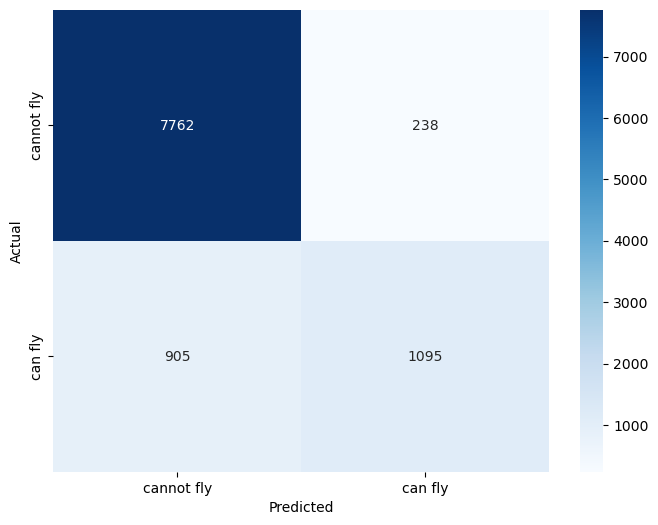

In [14]:
# Prédire les classes pour les données de test
y_pred = model.predict(x_test)
y_pred_bin = (y_pred > 0.5).astype(int)

# Générer et afficher le rapport de classification
print(classification_report(y_test_bin, y_pred_bin, target_names=['cannot fly', 'can fly']))

# Générer et afficher la matrice de confusion
cm = confusion_matrix(y_test_bin, y_pred_bin)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['cannot fly', 'can fly'], yticklabels=['cannot fly', 'can fly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()